_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [1]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Parking Availability</div>

<div class="usecase-authors"><b>Authored by: </b> Angie Hollingworth, Siju Deng</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

### new

In [134]:
import os
import requests
import pandas as pd

# Fetch parking data from API
def fetch_parking_data(base_url, dataset, api_key, num_records=99, offset=0):
    all_records = []
    max_offset = 9900  # Set a maximum offset value based on API limitations

    while True:
        if offset > max_offset:
            break

        filters = f'{dataset}/records?limit={num_records}&offset={offset}'
        url = f'{base_url}{filters}&{api_key}'
        try:
            result = requests.get(url, timeout=10)
            result.raise_for_status()
            records = result.json().get('results')
        except requests.exceptions.RequestException as e:
            raise Exception(f"API request failed: {e}")

        if records is None:
            break
        all_records.extend(records)
        if len(records) < num_records:
            break
        offset += num_records

    df = pd.DataFrame(all_records)
    return df

API_KEY = os.environ.get('MELBOURNE_API_KEY', input("Please enter your API key: "))
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

Please enter your API key:  558000cd83c1d1ba8c4a5e09e0063424750542b70b132293e63b645a


In [92]:
SENSOR_DATASET = 'on-street-parking-bay-sensors'

df = fetch_parking_data(BASE_URL, SENSOR_DATASET, API_KEY)

# Extract latitude and longitude
df['location_lat'] = df['location'].apply(lambda x: x.get('lat', None))
df['location_lon'] = df['location'].apply(lambda x: x.get('lon', None))

# Drop the original location column
df.drop(columns=['location'], inplace=True)

# Display the DataFrame
print(df.head())


                 lastupdated           status_timestamp  zone_number  \
0  2023-07-20T05:44:36+00:00  2023-07-19T21:24:38+00:00       7358.0   
1  2023-07-20T05:44:36+00:00  2023-07-20T05:23:46+00:00       7358.0   
2  2023-07-20T05:44:36+00:00  2023-07-20T04:46:01+00:00       7358.0   
3  2023-07-24T06:44:36+00:00  2023-07-24T06:16:08+00:00       7638.0   
4  2023-07-24T06:44:36+00:00  2023-07-24T05:50:20+00:00       7638.0   

  status_description  parkingbay_id  location_lat  location_lon  
0         Unoccupied           7075    -37.814591    144.969350  
1            Present           7076    -37.814569    144.969424  
2         Unoccupied           7077    -37.814547    144.969500  
3         Unoccupied           5852    -37.813205    144.968283  
4         Unoccupied           5874    -37.813361    144.968354  


In [93]:
df

lastupdated           status_timestamp  zone_number  \
0     2023-07-20T05:44:36+00:00  2023-07-19T21:24:38+00:00       7358.0   
1     2023-07-20T05:44:36+00:00  2023-07-20T05:23:46+00:00       7358.0   
2     2023-07-20T05:44:36+00:00  2023-07-20T04:46:01+00:00       7358.0   
3     2023-07-24T06:44:36+00:00  2023-07-24T06:16:08+00:00       7638.0   
4     2023-07-24T06:44:36+00:00  2023-07-24T05:50:20+00:00       7638.0   
...                         ...                        ...          ...   
5172  2023-09-05T14:20:36+00:00  2023-09-05T13:41:48+00:00       7413.0   
5173  2023-09-05T14:20:36+00:00  2023-09-05T14:12:31+00:00       7320.0   
5174  2023-09-05T14:20:36+00:00  2023-09-05T12:37:34+00:00       7320.0   
5175  2023-09-05T14:20:36+00:00  2022-12-10T13:00:11+00:00       7501.0   
5176  2023-09-05T14:20:36+00:00  2023-02-08T20:27:26+00:00       7502.0   

     status_description  parkingbay_id  location_lat  location_lon  
0            Unoccupied           7075    -37.814591    144.969350  
1               Present           7076    -37.814569    144.969424  
2            Unoccupied           7077    -37.814547    144.969500  
3            Unoccupied           5852    -37.813205    144.968283  
4            Unoccupied           5874    -37.813361    144.968354  
...                 ...            ...           ...           ...  
5172         Unoccupied          51013    -37.812758    144.970963  
5173         Unoccupied          63554    -37.812530    144.969320  
5174            Present          63553    -37.812511    144.969384  
5175            Present          15256    -37.809153    144.965581  
5176         Unoccupied          15259    -37.809096    144.965772  

[5177 rows x 7 columns]

### old

In [ ]:
# import pandas as pd
# from sodapy import Socrata

# # find the parking dataset @ https://data.melbourne.vic.gov.au/Transport/On-street-Parking-Bay-Sensors/vh2v-4nfs
# parking_dataset_id = 'vh2v-4nfs'
# # app tokens are just used to manage throttling (not authentication)
# app_token = '[your app token]' #find out about app tokens @ https://dev.socrata.com/docs/app-tokens.html
# bucket = 'opendataplayground.deakin'

# # Access open data through Socrata client
# client = Socrata(
#     "data.melbourne.vic.gov.au",
#     app_token,
#     timeout=120
# )

# # read snapshot of parking sensors status
# api_results = client.get_all(parking_dataset_id)
# parking_sensors = pd.DataFrame.from_dict(api_results)
# parking_sensors = parking_sensors.astype({'lat':'float64', 'lon':'float64'})
# # remove duplicates found in the parking sensor data
# parking_sensors = parking_sensors.drop_duplicates()
# parking_sensors[['lat', 'lon', 'status']].to_json('./latest_parking_sensors.json')


#### Function to get full dataset

### new

In [8]:
def validate_data(df):
    print("\nChecking for NaN values:")
    print(df.isna().sum())
    print("\nChecking for Duplicates:")
    print(df.duplicated().sum())
    print("\nChecking data types:")
    print(df.dtypes)

validate_data(df)


Checking for NaN values:
lastupdated             0
status_timestamp        0
zone_number           415
status_description      0
parkingbay_id           0
location_lat            0
location_lon            0
dtype: int64

Checking for Duplicates:
0

Checking data types:
lastupdated            object
status_timestamp       object
zone_number           float64
status_description     object
parkingbay_id           int64
location_lat          float64
location_lon          float64
dtype: object


In [9]:
# Create a new DataFrame for analysis based on the original df
df_analysis = df.copy()

# Convert 'lastupdated' and 'status_timestamp' to datetime objects
df_analysis['lastupdated'] = pd.to_datetime(df_analysis['lastupdated'])
df_analysis['status_timestamp'] = pd.to_datetime(df_analysis['status_timestamp'])

# Identify the most recent timestamp
latest_timestamp = df_analysis['status_timestamp'].max()

# Calculate the date one year ago from the most recent timestamp
one_year_ago = latest_timestamp - pd.DateOffset(years=1)

# Identify rows with 'status_timestamp' older than one year
outdated_rows = df_analysis[df_analysis['status_timestamp'] < one_year_ago].copy()

# Print these outdated rows, sorted by 'status_timestamp'
print("Outdated rows:")
print(outdated_rows.sort_values(by='status_timestamp').head())

# Print the data header sorted by 'status_timestamp'
print("\nData header sorted by time:")
print(df_analysis.sort_values(by='status_timestamp').head())

# Delete outdated rows
df_analysis = df_analysis[df_analysis['status_timestamp'] >= one_year_ago]


Outdated rows:
                   lastupdated          status_timestamp  zone_number  \
4591 2023-09-05 12:22:36+00:00 1970-01-01 00:00:00+00:00       7112.0   
3215 2023-09-05 12:22:36+00:00 2022-07-27 23:03:14+00:00       7062.0   
4999 2023-09-05 12:22:36+00:00 2022-08-02 08:41:19+00:00          NaN   

     status_description  parkingbay_id  location_lat  location_lon  
4591         Unoccupied          23650    -37.801596    144.969723  
3215         Unoccupied          21358    -37.803218    144.962660  
4999         Unoccupied          24999    -37.809305    144.974109  

Data header sorted by time:
                   lastupdated          status_timestamp  zone_number  \
4591 2023-09-05 12:22:36+00:00 1970-01-01 00:00:00+00:00       7112.0   
3215 2023-09-05 12:22:36+00:00 2022-07-27 23:03:14+00:00       7062.0   
4999 2023-09-05 12:22:36+00:00 2022-08-02 08:41:19+00:00          NaN   
4721 2023-09-05 12:22:36+00:00 2022-09-13 04:38:23+00:00       7247.0   
689  2023-09-05 12:20:

In [10]:
# Detect duplicates based on all columns
duplicates = df_analysis.duplicated(subset=['parkingbay_id','status_description','location_lat','location_lon'], keep=False)

# Display duplicates
print("Duplicate Rows based on all columns are:")
print(df_analysis[duplicates].sort_values('parkingbay_id'))


Duplicate Rows based on all columns are:
                   lastupdated          status_timestamp  zone_number  \
84   2023-09-05 12:20:36+00:00 2023-09-05 09:50:52+00:00       7649.0   
888  2023-09-05 12:22:36+00:00 2023-09-05 09:50:52+00:00       7649.0   
85   2023-09-05 12:20:36+00:00 2023-09-05 11:53:43+00:00       7274.0   
889  2023-09-05 12:22:36+00:00 2023-09-05 11:53:43+00:00       7274.0   
86   2023-09-05 12:20:36+00:00 2023-09-05 11:44:04+00:00       7274.0   
...                        ...                       ...          ...   
1669 2023-09-05 12:22:36+00:00 2023-09-04 08:45:55+00:00          NaN   
829  2023-09-05 12:20:36+00:00 2023-09-05 04:48:56+00:00       7345.0   
1671 2023-09-05 12:22:36+00:00 2023-09-05 04:48:56+00:00       7345.0   
828  2023-09-05 12:20:36+00:00 2023-09-05 12:16:42+00:00       7345.0   
1670 2023-09-05 12:22:36+00:00 2023-09-05 12:16:42+00:00       7345.0   

     status_description  parkingbay_id  location_lat  location_lon  
84           

In [11]:
# Remove duplicates based on specified columns in df_analysis
df_analysis.drop_duplicates(subset=['parkingbay_id', 'status_description', 'location_lat', 'location_lon', 'lastupdated'], keep='first', inplace=True)



In [12]:
from datetime import datetime
import pytz

# Create a timezone object for Melbourne
melbourne_tz = pytz.timezone('Australia/Melbourne')

# Get the current time in UTC
current_time_utc = datetime.now(pytz.utc)

# Convert to Melbourne local time
current_time_melbourne = current_time_utc.astimezone(melbourne_tz)

print(f"Current time in UTC: {current_time_utc}")
print(f"Current time in Melbourne: {current_time_melbourne}")


Current time in UTC: 2023-09-05 12:24:03.463648+00:00
Current time in Melbourne: 2023-09-05 22:24:03.463648+10:00


In [13]:
# Convert 'status_timestamp' to Melbourne local time
df_analysis['status_timestamp'] = df_analysis['status_timestamp'].apply(lambda x: x.astimezone(melbourne_tz))


### Try to analyze the data directly

### doesn't seem to be available, try calculating

In [14]:
import folium

# Initialize the map centered around a latitude and longitude
m = folium.Map(location=[-37.814, 144.96332], zoom_start=16)  # 16 is the zoom level

# Add points to the map using df_analysis
for idx, row in df.iterrows():
    color = "blue" if row['status_description'] == "Unoccupied" else "red"
    folium.CircleMarker(location=[row['location_lat'], row['location_lon']],
                        radius=1,  # Reduced size
                        color=color,
                        fill=True,
                        fill_color=color).add_to(m)

# Show the map
m


In [32]:
# Drop duplicate rows based on 'location_lat' and 'location_lon'
unique_locations = df_analysis.drop_duplicates(subset=['location_lat', 'location_lon'])

# Count the number of unique parking spaces based on location
total_unique_parking_spaces = len(unique_locations)

print(f"The total number of unique parking spaces based on location is {total_unique_parking_spaces}.")


The total number of unique parking spaces based on location is 4689.


In [15]:
# Group by latitude and longitude and count occurrences in df_analysis
location_counts = df_analysis.groupby(['location_lat', 'location_lon']).size().reset_index(name='Occurrences')

# Identify locations that appear more than once in df_analysis
duplicate_locations = location_counts[location_counts['Occurrences'] > 1]

# Print out the duplicate locations in df_analysis
if duplicate_locations.empty:
    print("Each geographic location occurs only once.")
else:
    print("Duplicate geographic locations found:")
    print(duplicate_locations)


Duplicate geographic locations found:
      location_lat  location_lon  Occurrences
434     -37.824917    144.960159            2
603     -37.820821    144.956338            2
611     -37.820756    144.955710            2
612     -37.820752    144.956577            2
614     -37.820737    144.955774            2
...            ...           ...          ...
4405    -37.801544    144.962522            2
4422    -37.801404    144.958623            2
4467    -37.800995    144.958696            2
4476    -37.800882    144.958716            2
4485    -37.800767    144.958736            2

[477 rows x 3 columns]


In [16]:
# Filter rows in df_analysis where geographic locations are duplicated
duplicate_locations = df_analysis[df_analysis.duplicated(subset=['location_lat', 'location_lon'], keep=False)]

# Sort these rows in df_analysis by latitude, longitude, and parkingbay_id for easier inspection
sorted_duplicates = duplicate_locations.sort_values(by=['location_lat', 'location_lon', 'parkingbay_id'])

# Print parkingbay_id for duplicate locations in df_analysis
print("parkingbay id for duplicate locations:")
print(sorted_duplicates[['location_lat', 'location_lon', 'parkingbay_id']])


parkingbay id for duplicate locations:
      location_lat  location_lon  parkingbay_id
856     -37.824917    144.960159          24532
1698    -37.824917    144.960159          24532
153     -37.820821    144.956338           7817
957     -37.820821    144.956338           7817
159     -37.820756    144.955710           5860
...            ...           ...            ...
1197    -37.800995    144.958696           8990
394     -37.800882    144.958716           8992
1198    -37.800882    144.958716           8992
395     -37.800767    144.958736           8994
1199    -37.800767    144.958736           8994

[962 rows x 3 columns]


In [17]:
# Assuming df_analysis is your DataFrame for analysis
duplicate_parking_ids = df_analysis[df_analysis['parkingbay_id'].duplicated(keep=False)]

# Sort the data in df_analysis for easier inspection
duplicate_parking_ids = duplicate_parking_ids.sort_values('parkingbay_id')

if len(duplicate_parking_ids) > 0:
    print("Duplicate parkingbay_id found in df_analysis:")
    print(duplicate_parking_ids[['parkingbay_id', 'location_lat', 'location_lon']])
else:
    print("No duplicate parkingbay_id found in df_analysis.")


Duplicate parkingbay_id found in df_analysis:
      parkingbay_id  location_lat  location_lon
84             5369    -37.808886    144.971778
888            5369    -37.808886    144.971778
85             5382    -37.808897    144.971908
889            5382    -37.808897    144.971908
86             5386    -37.808802    144.971864
...             ...           ...           ...
1669          63613    -37.812909    144.967463
829           63618    -37.813021    144.967182
1671          63618    -37.813021    144.967182
828           63623    -37.813116    144.966860
1670          63623    -37.813116    144.966860

[800 rows x 3 columns]


In [18]:
# Filter for 'Unoccupied' status in df_analysis
unoccupied_spaces = df_analysis[df_analysis['status_description'] == 'Unoccupied']

# Sort by 'status_timestamp' in df_analysis
sorted_unoccupied = unoccupied_spaces.sort_values(by='status_timestamp')

# Find the earliest time for each unique parking space based on latitude and longitude in df_analysis
earliest_unoccupied = sorted_unoccupied.drop_duplicates(subset=['location_lat', 'location_lon'], keep='first')

# Display the result
print("The earliest time each parking space was detected as empty in df_analysis:")
print(earliest_unoccupied[['location_lat', 'location_lon', 'status_timestamp']])


The earliest time each parking space was detected as empty in df_analysis:
      location_lat  location_lon          status_timestamp
4721    -37.810928    144.976544 2022-09-13 14:38:23+10:00
689     -37.821925    144.954791 2022-10-16 09:53:33+11:00
4139    -37.821944    144.954727 2022-10-16 14:49:10+11:00
1166    -37.803458    144.965644 2022-10-24 21:16:58+11:00
4171    -37.802641    144.966506 2022-11-08 08:47:41+11:00
...            ...           ...                       ...
4791    -37.801891    144.958080 2023-09-05 22:17:44+10:00
3672    -37.812804    144.962601 2023-09-05 22:17:46+10:00
2437    -37.822183    144.969850 2023-09-05 22:17:46+10:00
2253    -37.800974    144.965385 2023-09-05 22:17:47+10:00
3592    -37.812794    144.952506 2023-09-05 22:17:54+10:00

[2596 rows x 3 columns]


## today analysis

In [19]:

# Convert to datetime format
df_analysis['lastupdated'] = pd.to_datetime(df_analysis['lastupdated'])
df_analysis['status_timestamp'] = pd.to_datetime(df_analysis['status_timestamp'])

# Sort and filter
sorted_df = df_analysis.sort_values(by=['location_lat', 'location_lon', 'status_timestamp'])
current_vacant = sorted_df[sorted_df['status_description'] == 'Unoccupied'].copy()

# Initialize result DataFrame
result = pd.DataFrame(columns=['location_lat', 'location_lon', 'last_occupied_time'])

# Loop through each vacant space to check its history
for idx, row in current_vacant.iterrows():
    lat, lon, current_time = row['location_lat'], row['location_lon'], row['status_timestamp']
    time_threshold = current_time - pd.Timedelta(hours=3)
    previous_records = sorted_df[(sorted_df['location_lat'] == lat) & (sorted_df['location_lon'] == lon) & (sorted_df['status_timestamp'] >= time_threshold) & (sorted_df['status_description'] == 'Present')]

    if not previous_records.empty:
        last_occupied_time = previous_records['status_timestamp'].max()
        new_row = pd.DataFrame({'location_lat': [lat], 'location_lon': [lon], 'last_occupied_time': [last_occupied_time]})
        result = pd.concat([result, new_row], ignore_index=True)

# Display the result
print("Parking spaces that were occupied a few hours ago and are now vacant:")
print(result)


Parking spaces that were occupied a few hours ago and are now vacant:
    location_lat  location_lon        last_occupied_time
0     -37.813646    144.968484 2023-09-05 10:20:15+10:00
1     -37.813644    144.968946 2023-09-05 21:29:26+10:00
2     -37.813625    144.969010 2023-09-05 21:20:53+10:00
3     -37.813624    144.968474 2023-09-05 19:40:40+10:00
4     -37.813614    144.971358 2023-09-05 18:52:23+10:00
5     -37.813609    144.971187 2023-09-05 20:03:27+10:00
6     -37.813531    144.968432 2023-09-05 17:14:28+10:00
7     -37.813485    144.968411 2023-09-05 19:00:14+10:00
8     -37.813361    144.968354 2023-09-05 21:23:46+10:00
9     -37.813273    144.968314 2023-09-05 20:14:09+10:00
10    -37.813250    144.968303 2023-09-05 19:03:15+10:00
11    -37.813205    144.968283 2023-09-05 18:11:45+10:00
12    -37.812540    144.970862 2023-09-05 20:25:02+10:00
13    -37.812195    144.969907 2023-09-05 21:32:23+10:00
14    -37.812154    144.970046 2023-09-05 22:16:28+10:00
15    -37.811826  

In [20]:
from datetime import datetime, timezone

# Get today's date
today = datetime.now(timezone.utc).date()

# Convert 'status_timestamp' to date only
df_analysis['status_date'] = df_analysis['status_timestamp'].dt.date

# Filter for today's data
todays_data = df_analysis[df_analysis['status_date'] == today]

# Count the number of rows
num_rows_today = len(todays_data)

# Display the result
print(f"There are {num_rows_today} rows in today's data.")


There are 4253 rows in today's data.


In [21]:
# Find the minimum and maximum timestamps for today's data
min_timestamp_today = todays_data['status_timestamp'].min()
max_timestamp_today = todays_data['status_timestamp'].max()

# Display the result
print(f"The data for today ranges from {min_timestamp_today} to {max_timestamp_today}.")


The data for today ranges from 2023-09-05 00:06:10+10:00 to 2023-09-05 22:17:54+10:00.


In [40]:
# Group by unique identifier for each parking space and count unique statuses
status_counts = todays_data.groupby(['location_lat', 'location_lon'])['status_description'].nunique().reset_index(name='Unique_Status_Count')

# Filter for parking spaces with more than one unique status
multiple_statuses = status_counts[status_counts['Unique_Status_Count'] > 1]

# Display the result
if multiple_statuses.empty:
    print("No parking spaces with multiple statuses found for today.")
else:
    print("Parking spaces with multiple statuses found for today:")
    print(multiple_statuses)

No parking spaces with multiple statuses found for today.


In [25]:
# Extract the hour from the 'status_timestamp' and create a new column 'update_hour'
todays_data.loc[:, 'update_hour'] = todays_data['status_timestamp'].dt.hour# Create a frequency table for the update times
frequency_table = todays_data['update_hour'].value_counts().sort_index()

# Display the frequency table
print("Frequency table for update times:")
print(frequency_table)



Frequency table for update times:
update_hour
0        3
1        4
2        2
6        8
7        8
8       33
9       25
10      17
11      21
12      28
13      38
14      90
15     113
16     179
17     269
18     402
19     436
20     666
21    1260
22     651
Name: count, dtype: int64


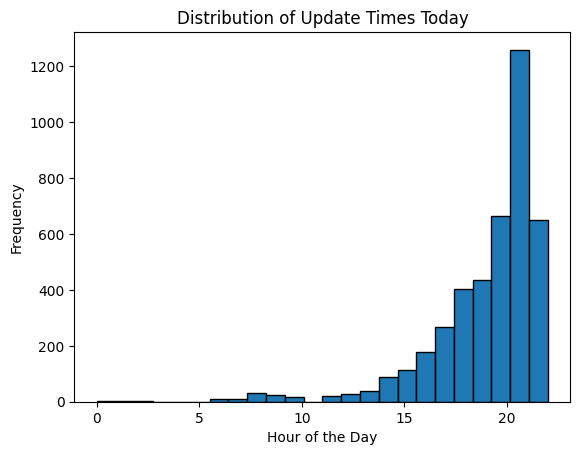

In [26]:
import matplotlib.pyplot as plt

# Plot a histogram for the update times
plt.hist(todays_data['update_hour'], bins=24, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Update Times Today')
plt.show()


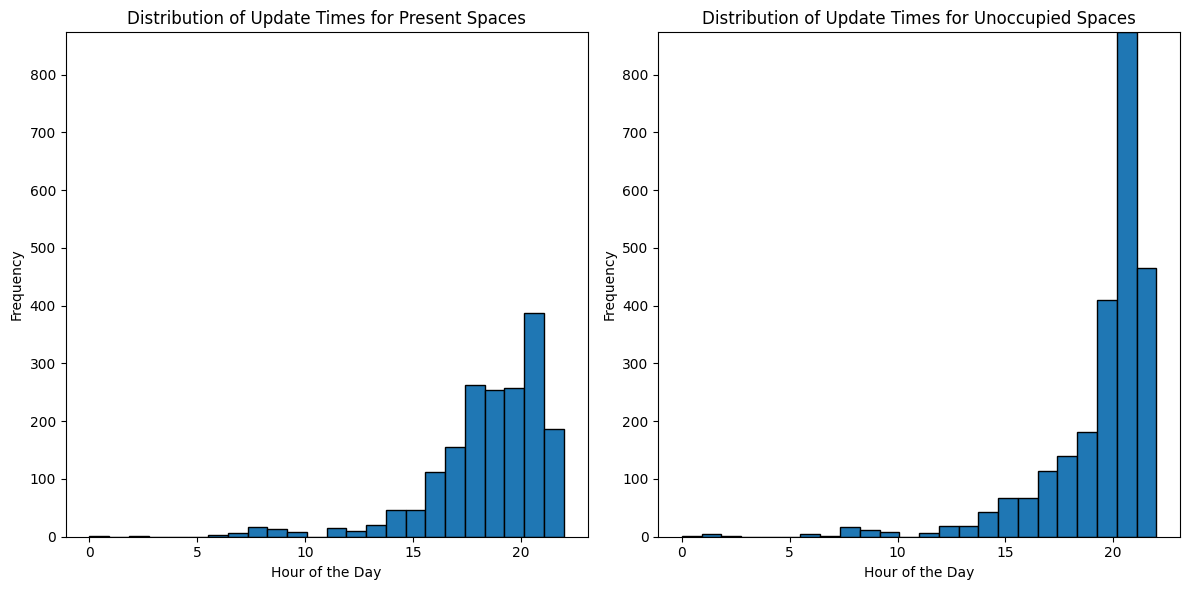

In [39]:
import matplotlib.pyplot as plt

# Filter data for 'Present' and 'Unoccupied' states
present_data = todays_data[todays_data['status_description'] == 'Present']
unoccupied_data = todays_data[todays_data['status_description'] == 'Unoccupied']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Find the maximum frequency to set the same y-axis limit for both subplots
max_frequency = max(
    present_data['update_hour'].value_counts().max(),
    unoccupied_data['update_hour'].value_counts().max()
)

# Plot histogram for 'Present' state
axes[0].hist(present_data['update_hour'], bins=24, edgecolor='black')
axes[0].set_title('Distribution of Update Times for Present Spaces')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim([0, max_frequency])

# Plot histogram for 'Unoccupied' state
axes[1].hist(unoccupied_data['update_hour'], bins=24, edgecolor='black')
axes[1].set_title('Distribution of Update Times for Unoccupied Spaces')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Frequency')
axes[1].set_ylim([0, max_frequency])

# Show the plots
plt.tight_layout()
plt.show()


## get bay id

In [135]:
# Example usage
SENSOR_DATASET = 'on-street-parking-bays'


In [136]:
bay_df  = fetch_parking_data(BASE_URL, SENSOR_DATASET, API_KEY)

In [143]:
bay_df

geo_point_2d  \
0     {'lon': 144.93563414798302, 'lat': -37.8227455...   
1     {'lon': 144.98461853185907, 'lat': -37.8299067...   
2     {'lon': 144.9743972514384, 'lat': -37.81577901...   
3     {'lon': 144.96743883205434, 'lat': -37.8110919...   
4     {'lon': 144.95435921055855, 'lat': -37.7849210...   
...                                                 ...   
9994  {'lon': 144.981172907813, 'lat': -37.809266435...   
9995  {'lon': 144.9697047894569, 'lat': -37.79748816...   
9996  {'lon': 144.96953780147317, 'lat': -37.7990112...   
9997  {'lon': 144.9568773900466, 'lat': -37.80935750...   
9998  {'lon': 144.98336403797197, 'lat': -37.8107854...   

                                              geo_shape rd_seg_id marker_id  \
0     {'type': 'Feature', 'geometry': {'coordinates'...     22131      None   
1     {'type': 'Feature', 'geometry': {'coordinates'...     22716    20086E   
2     {'type': 'Feature', 'geometry': {'coordinates'...     22630      None   
3     {'type': 'Feature', 'geometry': {'coordinates'...     20151      None   
4     {'type': 'Feature', 'geometry': {'coordinates'...      None      None   
...                                                 ...       ...       ...   
9994  {'type': 'Feature', 'geometry': {'coordinates'...     20897      None   
9995  {'type': 'Feature', 'geometry': {'coordinates'...     20817      None   
9996  {'type': 'Feature', 'geometry': {'coordinates'...     20710      None   
9997  {'type': 'Feature', 'geometry': {'coordinates'...      None     C6776   
9998  {'type': 'Feature', 'geometry': {'coordinates'...     21860    12095W   

     bay_id meter_id                                         rd_seg_dsc  \
0      7779     None  Lorimer Street between Boundary Street and Ing...   
1      3441     None  Anderson Street between Clowes Street and St L...   
2     20418     None  Wellington Parade South between Wellington Cre...   
3      8631     None  Russell Street between Little Bourke Street an...   
4     16657     None                                               None   
...     ...      ...                                                ...   
9994  23579     None  Eades Street between Victoria Parade and Alber...   
9995   1932     None  Elgin Street between Rathdowne Street and Drum...   
9996   1052     None  Faraday Street between Rathdowne Street and Dr...   
9997  18947     None                                               None   
9998   7931     IAW6  Clarendon Street between Grey Street and Alber...   

           last_edit  
0     20201223122252  
1     20201223122245  
2     20201208142017  
3     20201208140729  
4     20201208141616  
...              ...  
9994  20210426122440  
9995  20201223122240  
9996  20201223122240  
9997  20201208141838  
9998  20201223122252  

[9999 rows x 8 columns]

In [144]:
# Extract latitude and longitude from the 'geo_point_2d' column
bay_df['location_lat'] = bay_df['geo_point_2d'].apply(lambda x: x.get('lat', None))
bay_df['location_lon'] = bay_df['geo_point_2d'].apply(lambda x: x.get('lon', None))

# Drop the original 'geo_point_2d' column
bay_df.drop(columns=['geo_point_2d'], inplace=True)

# Display the DataFrame
bay_df.head()


geo_shape rd_seg_id marker_id  \
0  {'type': 'Feature', 'geometry': {'coordinates'...     22131      None   
1  {'type': 'Feature', 'geometry': {'coordinates'...     22716    20086E   
2  {'type': 'Feature', 'geometry': {'coordinates'...     22630      None   
3  {'type': 'Feature', 'geometry': {'coordinates'...     20151      None   
4  {'type': 'Feature', 'geometry': {'coordinates'...      None      None   

  bay_id meter_id                                         rd_seg_dsc  \
0   7779     None  Lorimer Street between Boundary Street and Ing...   
1   3441     None  Anderson Street between Clowes Street and St L...   
2  20418     None  Wellington Parade South between Wellington Cre...   
3   8631     None  Russell Street between Little Bourke Street an...   
4  16657     None                                               None   

        last_edit  location_lat  location_lon  
0  20201223122252    -37.822746    144.935634  
1  20201223122245    -37.829907    144.984619  
2  20201208142017    -37.815779    144.974397  
3  20201208140729    -37.811092    144.967439  
4  20201208141616    -37.784921    144.954359

In [145]:
# Round latitude and longitude to 6 decimal places
df_analysis['location_lat'] = df_analysis['location_lat'].round(6)
df_analysis['location_lon'] = df_analysis['location_lon'].round(6)
bay_df['location_lat'] = bay_df['location_lat'].round(6)
bay_df['location_lon'] = bay_df['location_lon'].round(6)


In [146]:
# Perform a left merge to add bay_id to df_analysis
df_analysis = pd.merge(df_analysis, bay_df[['location_lat', 'location_lon', 'bay_id']], 
                       how='left', 
                       left_on=['location_lat', 'location_lon'], 
                       right_on=['location_lat', 'location_lon'])


In [147]:
df_analysis

lastupdated          status_timestamp  zone_number  \
0    2023-07-20 05:44:36+00:00 2023-07-19 21:24:38+00:00       7358.0   
1    2023-07-20 05:44:36+00:00 2023-07-20 05:23:46+00:00       7358.0   
2    2023-07-20 05:44:36+00:00 2023-07-20 04:46:01+00:00       7358.0   
3    2023-07-24 06:44:36+00:00 2023-07-24 06:16:08+00:00       7638.0   
4    2023-07-24 06:44:36+00:00 2023-07-24 05:50:20+00:00       7638.0   
...                        ...                       ...          ...   
5170 2023-09-05 12:22:36+00:00 2023-09-05 11:18:24+00:00       7413.0   
5171 2023-09-05 12:22:36+00:00 2023-09-05 11:31:07+00:00       7320.0   
5172 2023-09-05 12:22:36+00:00 2023-09-05 12:17:31+00:00       7320.0   
5173 2023-09-05 12:22:36+00:00 2022-12-10 13:00:11+00:00       7501.0   
5174 2023-09-05 12:22:36+00:00 2023-02-08 20:27:26+00:00       7502.0   

     status_description  parkingbay_id  location_lat  location_lon  \
0            Unoccupied           7075    -37.814591    144.969350   
1               Present           7076    -37.814569    144.969424   
2            Unoccupied           7077    -37.814547    144.969500   
3            Unoccupied           5852    -37.813205    144.968283   
4            Unoccupied           5874    -37.813361    144.968354   
...                 ...            ...           ...           ...   
5170         Unoccupied          51013    -37.812758    144.970963   
5171            Present          63554    -37.812530    144.969320   
5172            Present          63553    -37.812511    144.969384   
5173            Present          15256    -37.809153    144.965581   
5174         Unoccupied          15259    -37.809096    144.965772   

     status_date bay_id  
0     2023-07-20    NaN  
1     2023-07-20    NaN  
2     2023-07-20   9631  
3     2023-07-24   8888  
4     2023-07-24   8900  
...          ...    ...  
5170  2023-09-05    NaN  
5171  2023-09-05    NaN  
5172  2023-09-05    NaN  
5173  2022-12-11    NaN  
5174  2023-02-09    NaN  

[5175 rows x 9 columns]

In [148]:
# Count the number of NaN values in the 'bay_id' column
num_nan = df_analysis['bay_id'].isna().sum()

print(f"There are {num_nan} NaN values in the 'bay_id' column.")


There are 3499 NaN values in the 'bay_id' column.


In [149]:
# Filter to only include today's data
todays_data_analysis = df_analysis[df_analysis['status_timestamp'].dt.date == pd.Timestamp.today().date()]

# Count the number of NaN values in the 'bay_id' column for today's data
num_nan_today = todays_data_analysis['bay_id'].isna().sum()

print(f"There are {num_nan_today} NaN values in the 'bay_id' column for today's data.")


There are 0 NaN values in the 'bay_id' column for today's data.


In [ ]:
# Group by hour and count the number of 'Unoccupied' statuses
vacant_by_hour = df[df['status_description'] == 'Unoccupied'].groupby('hour').size()

# Calculate the vacancy rate
vacancy_rate_by_hour = (vacant_by_hour / total_parking_spaces) * 100


In [ ]:
# Group by weekday and count the number of 'Present' statuses
occupied_by_weekday = df[df['status_description'] == 'Present'].groupby('weekday').size()

# Calculate the occupancy rate
occupancy_rate_by_weekday = (occupied_by_weekday / total_parking_spaces) * 100


In [ ]:
# Group by weekday and count the number of 'Unoccupied' statuses
vacant_by_weekday = df[df['status_description'] == 'Unoccupied'].groupby('weekday').size()

# Calculate the vacancy rate
vacancy_rate_by_weekday = (vacant_by_weekday / total_parking_spaces) * 100


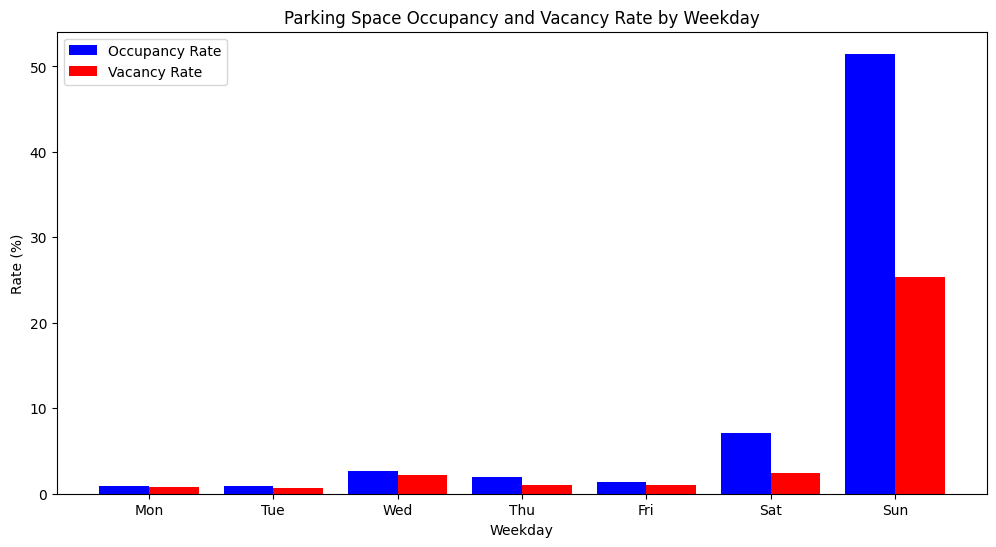

In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(occupancy_rate_by_weekday.index - 0.2, occupancy_rate_by_weekday.values, width=0.4, label='Occupancy Rate', color='b')
plt.bar(vacancy_rate_by_weekday.index + 0.2, vacancy_rate_by_weekday.values, width=0.4, label='Vacancy Rate', color='r')

plt.title('Parking Space Occupancy and Vacancy Rate by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Rate (%)')
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [ ]:
# Find all duplicated rows based on all columns
duplicated_rows = parking_sensors[parking_sensors.duplicated()]

# To include the first occurrence of the duplicate in the output, you can do:
duplicated_rows_including_first = parking_sensors[parking_sensors.duplicated(keep=False)]

# Print out the duplicated rows
if duplicated_rows.empty:
    print("No exact duplicate entries found.")
else:
    print("Found exact duplicate entries:")
    print(duplicated_rows)

# Print out the duplicated rows including the first occurrence
if duplicated_rows_including_first.empty:
    print("No exact duplicate entries found including first occurrences.")
else:
    print("Found exact duplicate entries including first occurrences:")
    print(duplicated_rows_including_first)


No exact duplicate entries found.
No exact duplicate entries found including first occurrences.


In [ ]:
import pandas as pd

# Assuming parking_sensors is your DataFrame
parking_sensors = parking_sensors.sort_values(by=['parkingbay_id', 'status_timestamp'])

# Calculate time difference for each row
parking_sensors['delta'] = parking_sensors.groupby('parkingbay_id')['status_timestamp'].diff()

# Determine short-term and long-term parking based on conditions
parking_sensors['parking_type'] = 'unknown'  # Default value
mask_short_term = (parking_sensors['status_description'] == 'Present') & (parking_sensors['delta'].dt.total_seconds() <= 3600)
mask_long_term = (parking_sensors['status_description'] == 'Present') & (parking_sensors['delta'].dt.total_seconds() > 3600)

parking_sensors.loc[mask_short_term, 'parking_type'] = 'short-term'
parking_sensors.loc[mask_long_term, 'parking_type'] = 'long-term'

# Count the instances
short_term_count = (parking_sensors['parking_type'] == 'short-term').sum()
long_term_count = (parking_sensors['parking_type'] == 'long-term').sum()

print(f"Short-term parking instances: {short_term_count}")
print(f"Long-term parking instances: {long_term_count}")


Short-term parking instances: 202
Long-term parking instances: 8


NameError: name 'plt' is not defined

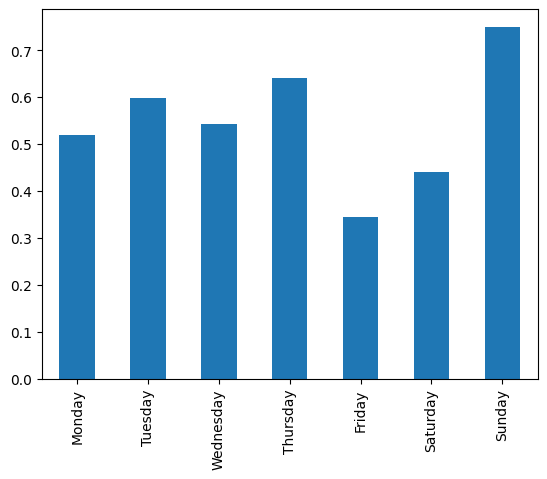

In [ ]:
# Group data by day of the week and occupancy status
daily_counts = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.dayofweek)['status_description'].value_counts().unstack().fillna(0)

# Define day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate occupancy rate for each day
daily_counts['occupancy_rate'] = daily_counts['Present'] / (daily_counts['Present'] + daily_counts['Unoccupied'])
daily_counts.index = days

# Plot the occupancy rate for each day
daily_counts['occupancy_rate'].plot(kind='bar')
plt.title('Daily Occupancy Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Occupancy Rate')
plt.show()


In [ ]:
unique_timestamps = parking_sensors['status_timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")


Number of unique timestamps: 4382


In [ ]:
sample_bay = parking_sensors[parking_sensors['parkingbay_id'] == parking_sensors['parkingbay_id'].iloc[0]]
print(sample_bay[['status_timestamp', 'status_description']])

              status_timestamp status_description
4554 2023-09-02 06:21:19+10:00         Unoccupied


In [ ]:
import numpy as np
# Calculate mean and standard deviation for the occupancy rate
mean_rate = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present'].mean()
std_rate = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present'].std()

# Calculate hourly occupancy rate
parking_sensors['hour'] = parking_sensors['status_timestamp'].dt.hour
hourly_occupancy = parking_sensors.groupby('hour')['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present']

# Compute the Z-scores for each hour
z_scores = (hourly_occupancy - mean_rate) / std_rate

# Detect anomalies where |Z| > 2
anomalies = z_scores[np.abs(z_scores) > 2]

print(anomalies)


Series([], Name: Present, dtype: float64)


### There seems to be only snapshot data. Try to cluster and visualize

In [ ]:
from sklearn.cluster import KMeans

# Use only occupied or unoccupied spots. Example for occupied:
occupied_spots = parking_sensors[parking_sensors['status_description'] == 'Present'][['location_lat', 'location_lon']]

kmeans = KMeans(n_clusters=5, n_init=10)  # Explicitly set n_init to 10
occupied_spots['cluster'] = kmeans.fit_predict(occupied_spots)


In [ ]:
import folium
from sklearn.cluster import KMeans

# Extract lat and lon of occupied and unoccupied parking bays
data_occupied = occupied_parking[['location_lat', 'location_lon']]
data_unoccupied = unoccupied_parking[['location_lat', 'location_lon']]

# Number of clusters
clusters = 100

# Cluster occupied parking spaces
kmeans_occupied = KMeans(n_clusters=clusters)
occupied_parking['cluster'] = kmeans_occupied.fit_predict(data_occupied)

# Cluster unoccupied parking spaces
kmeans_unoccupied = KMeans(n_clusters=clusters)
unoccupied_parking['cluster'] = kmeans_unoccupied.fit_predict(data_unoccupied)

# Create a base map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Plot occupied clusters
for cluster_num in set(occupied_parking['cluster']):
    cluster_data = occupied_parking[occupied_parking['cluster'] == cluster_num]
    center = [cluster_data['location_lat'].mean(), cluster_data['location_lon'].mean()]
    folium.Circle(
        location=center,
        radius=30,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f'Occupied Cluster {cluster_num}'
    ).add_to(m)

# Plot unoccupied clusters
for cluster_num in set(unoccupied_parking['cluster']):
    cluster_data = unoccupied_parking[unoccupied_parking['cluster'] == cluster_num]
    center = [cluster_data['location_lat'].mean(), cluster_data['location_lon'].mean()]
    folium.Circle(
        location=center,
        radius=30,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f'Unoccupied Cluster {cluster_num}'
    ).add_to(m)

m


C:\Users\asas3\.conda\envs\Python311_R361\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asas3\AppData\Local\Temp\ipykernel_23460\4141977650.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupied_parking['cluster'] = kmeans_occupied.fit_predict(data_occupied)
C:\Users\asas3\.conda\envs\Python311_R361\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, defa

### Try to extract cluster overlap as a short stop. But the time variable needs to be introduced.